# Demo 3.1 Part 1: Vertical and Horizontal Bar Charts 

- **Vertical Bar Charts**    
- **Horizontal Bar Charts**  

**Key Steps:**:  
  1. Read data into a dataframe  
  2. Change Data Types as needed  
  3. Aggregate with *groupby()*: Group on a Single Column     
  4. Plot!  



Filename:  **Cars.csv** 

In [64]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

Solving environment: ...working... done

# All requested packages already installed.



In [65]:
import pandas as pd
import plotly.express as px

# 1. Read the datafile into a dataframe  

In [66]:
#Read the csv file into a pandas dataframe
df = pd.read_csv('Data/Cars.csv')

print(df.shape)
df.head(2)

(428, 15)


Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172

# 2. Change data types as needed  
- If we want to do numeric calculations on a column it is important that pandas recognizes it as numeric. 
- We also want to make sure a column is a float (rather than integer) if needed.
- Otherwise either errors or weird results are going to happen!  


In [67]:
# data types 'Before' 
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [68]:
# Convert MSRP, Invoice, MPG_City, MPG_Highway to floats
df['MSRP'] = pd.to_numeric(df['MSRP']).astype(float)
df['Invoice'] = pd.to_numeric(df['Invoice']).astype(float)

df['MPG_City'] = pd.to_numeric(df['MPG_City']).astype(float)
df['MPG_Highway'] = pd.to_numeric(df['MPG_Highway']).astype(float)

In [69]:
# data types 'After' 
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP           float64
Invoice        float64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City       float64
MPG_Highway    float64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

# Question 1:  What is the Average City MPG By Vehicle Type?  
- Categorical Variable to Group On:  **Type**  
- Continuous Variable We're Interested In:  **MPG_City** 
- Aggregation Function:  **mean** 
 
- **Notes:**  
  - If we only select a single continuous variable/column we're interested in, groupby() will creat a pandas Data **Series** rather than a Dataframe  
  - Data Series are similar to Dataframes, but I think Dataframes are easier to work with and more familiar to you, so we're going to convert the Data Series to a Dataframe.


In [70]:
# Optional:  Display the unique values in the column we want to Group on
df['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [71]:
df.head(2)

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  36945.0  33337.0   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820.0  21761.0   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265      17.0         23.0    4451   
1         2.0        4.0         200      24.0         31.0    2778   

   Wheelbase  Length  
0        106     189  
1        101     172

# 3. Aggregate the Data: Grouping On a Single Column 


In [72]:
# This groupby will create a pandas Series rather than a Dataframe
ser_cars_by_type = df.groupby("Type")['MPG_City'].mean()

ser_cars_by_type

Type
Hybrid    55.000000
SUV       16.100000
Sedan     21.083969
Sports    18.408163
Truck     16.500000
Wagon     21.100000
Name: MPG_City, dtype: float64

In [73]:
type(ser_cars_by_type)

pandas.core.series.Series

### Convert the Series to a Dataframe (and/or Move Index to Being a Column)  

In [74]:
df_cars_by_type = ser_cars_by_type.reset_index(inplace=False)

type(df_cars_by_type)

pandas.core.frame.DataFrame

In [75]:
print(df_cars_by_type.shape)
df_cars_by_type.head()

(6, 2)


Type   MPG_City
0  Hybrid  55.000000
1     SUV  16.100000
2   Sedan  21.083969
3  Sports  18.408163
4   Truck  16.500000

# 4a. Plot: Vertical Bar Chart   

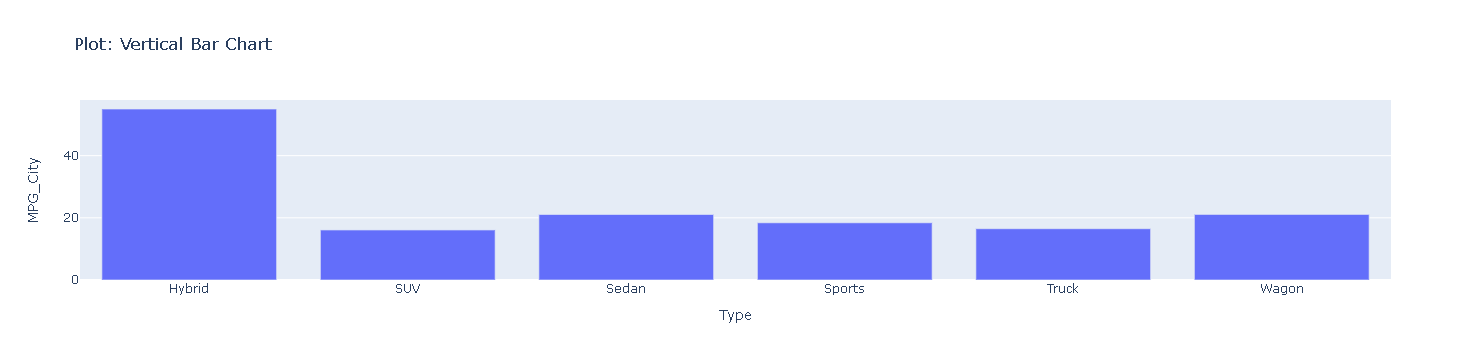

In [76]:
fig = px.bar(df_cars_by_type,
             x='Type',
             y='MPG_City',
             title='Plot: Vertical Bar Chart')
fig.show()

# 4.b Plot: Horizontal Bar Chart   
- **Note:**  When you sort the Dataframe to change the order of the Bars, the Horizontal Bar chart needs to be sorted the opposite way you probably expect!

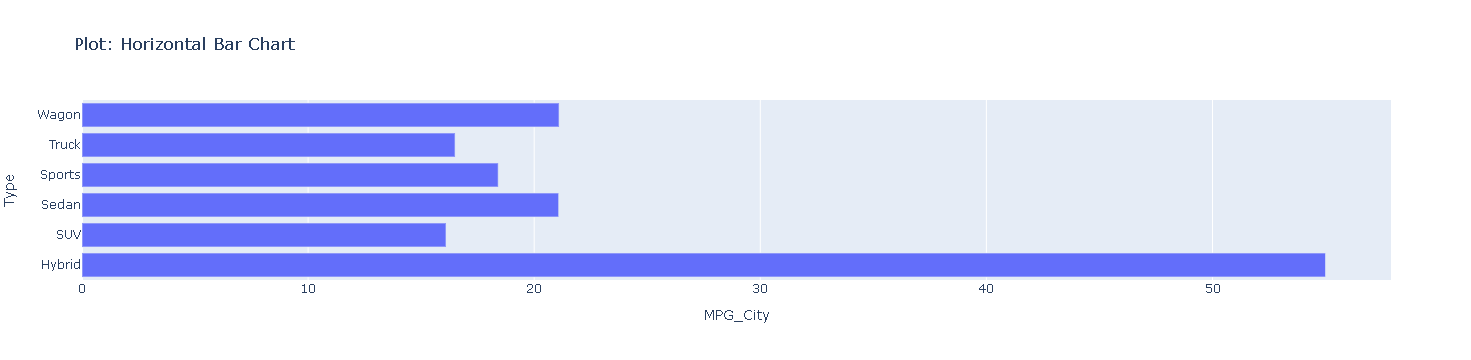

In [77]:
fig = px.bar(df_cars_by_type,
             x='MPG_City',
             y='Type',
             orientation='h',
             title='Plot: Horizontal Bar Chart')
fig.show()